In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import keras
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
#Read the csv, drop index column
df=pd.read_csv("transaction_dataset.csv")
df=df.iloc[:,2:]



In [232]:
pd.set_option('display.max_columns', None)
df.info()

#df.columns = df.columns.str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

Turn object variables into 'category' dtype for more computation efficiency


In [233]:


categories = df.select_dtypes('O').columns.astype('category')
df[categories]
print(len(df.columns))
for i in df.columns:
    print(f'La column --{i}-- tiene --{len(df[i].value_counts())}-- valores únicos')

df.describe()

print((df.FLAG==1).value_counts())

49
Column --Address-- has --9816-- unique values
Column --FLAG-- has --2-- unique values
Column --Avg min between sent tnx-- has --5013-- unique values
Column --Avg min between received tnx-- has --6223-- unique values
Column --Time Diff between first and last (Mins)-- has --7810-- unique values
Column --Sent tnx-- has --641-- unique values
Column --Received Tnx-- has --727-- unique values
Column --Number of Created Contracts-- has --20-- unique values
Column --Unique Received From Addresses-- has --256-- unique values
Column --Unique Sent To Addresses-- has --258-- unique values
Column --min value received-- has --4589-- unique values
Column --max value received -- has --6302-- unique values
Column --avg val received-- has --6767-- unique values
Column --min val sent-- has --4719-- unique values
Column --max val sent-- has --6647-- unique values
Column --avg val sent-- has --5854-- unique values
Column --min value sent to contract-- has --3-- unique values
Column --max val sent to con

Inspect numerical columns

Central tendency

In [234]:

df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000

CORRELATION VALUES


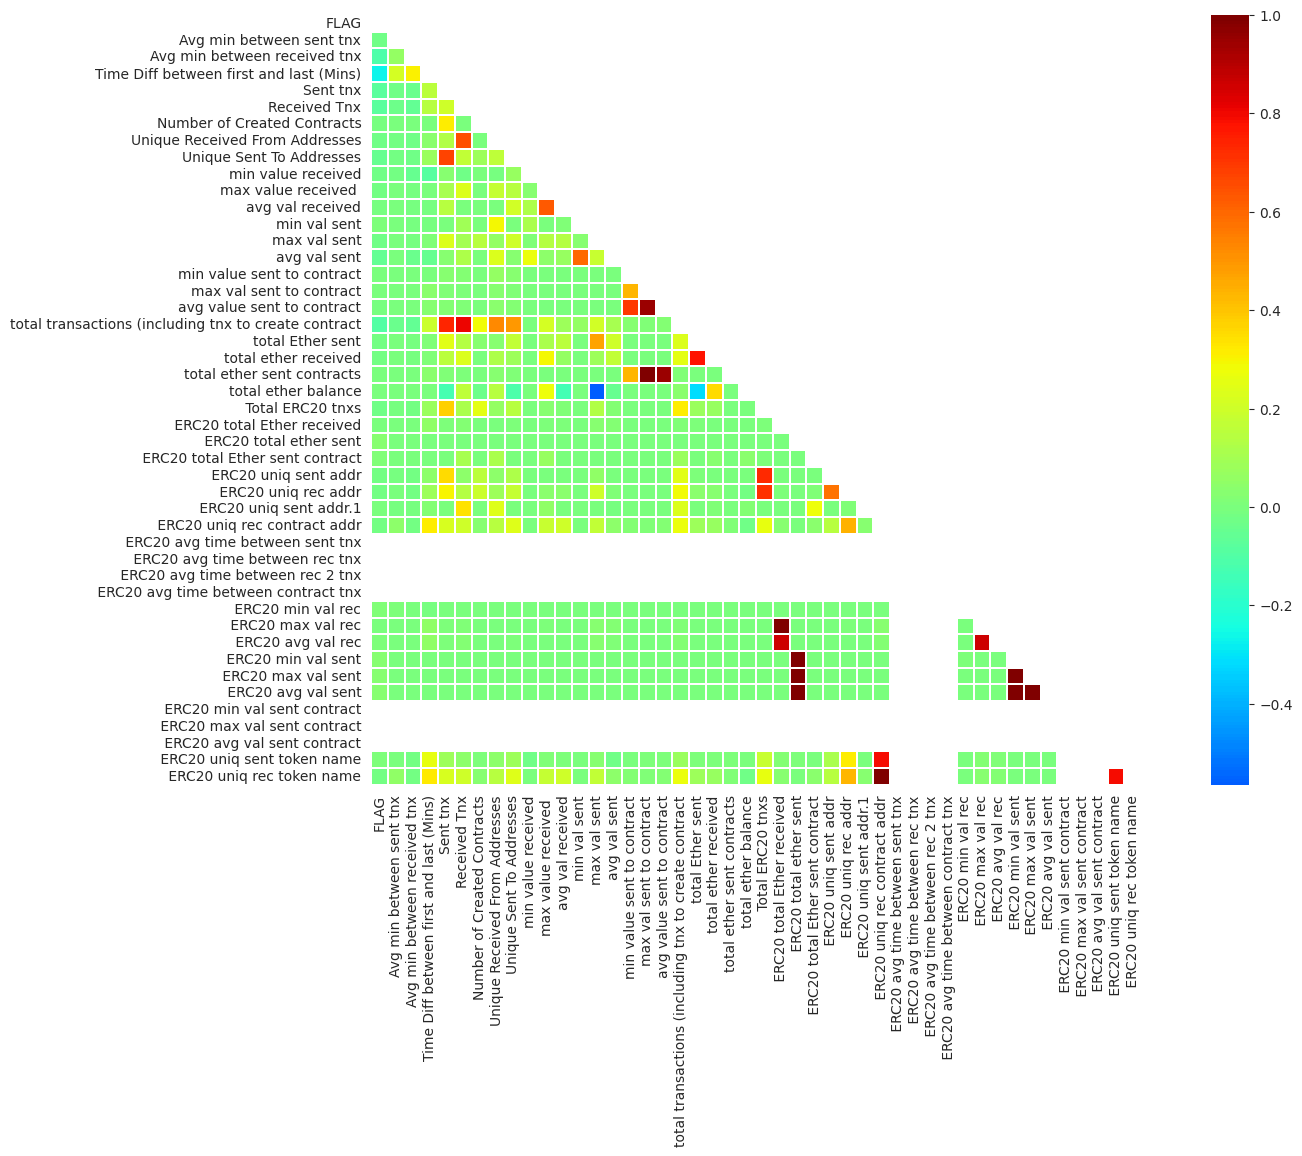

In [235]:
corr = df.corr()
print ("CORRELATION VALUES")
#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='jet', linewidths=0.1, center=0, square=True)

0    7412
1    1655
Name: FLAG, dtype: int64


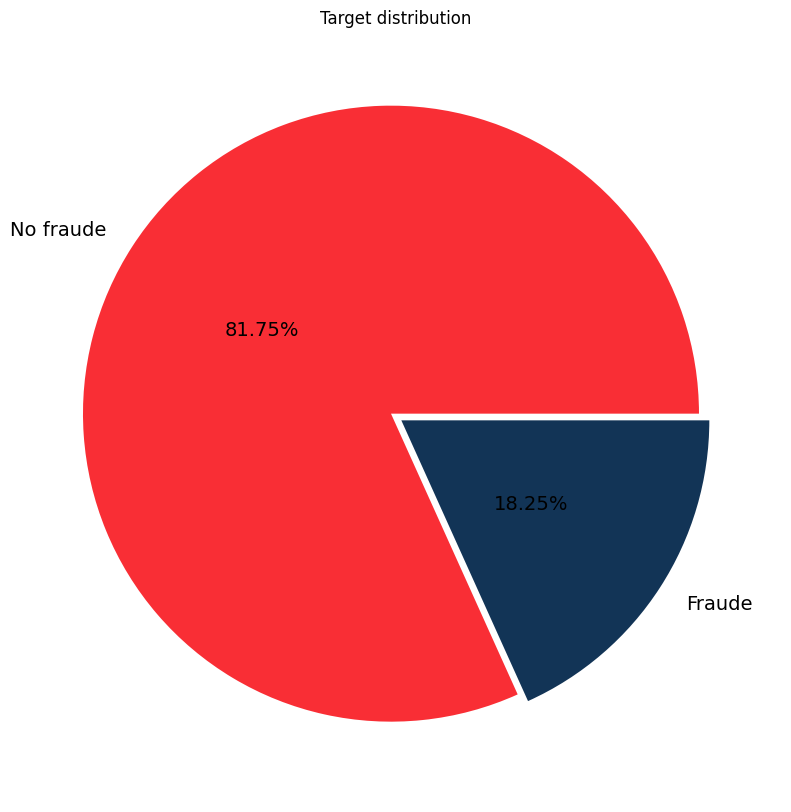

In [256]:
# Distribución de fraude/ no fraude
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['No fraude', 'Fraude']
colors = ['#f92e35', '#123456']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

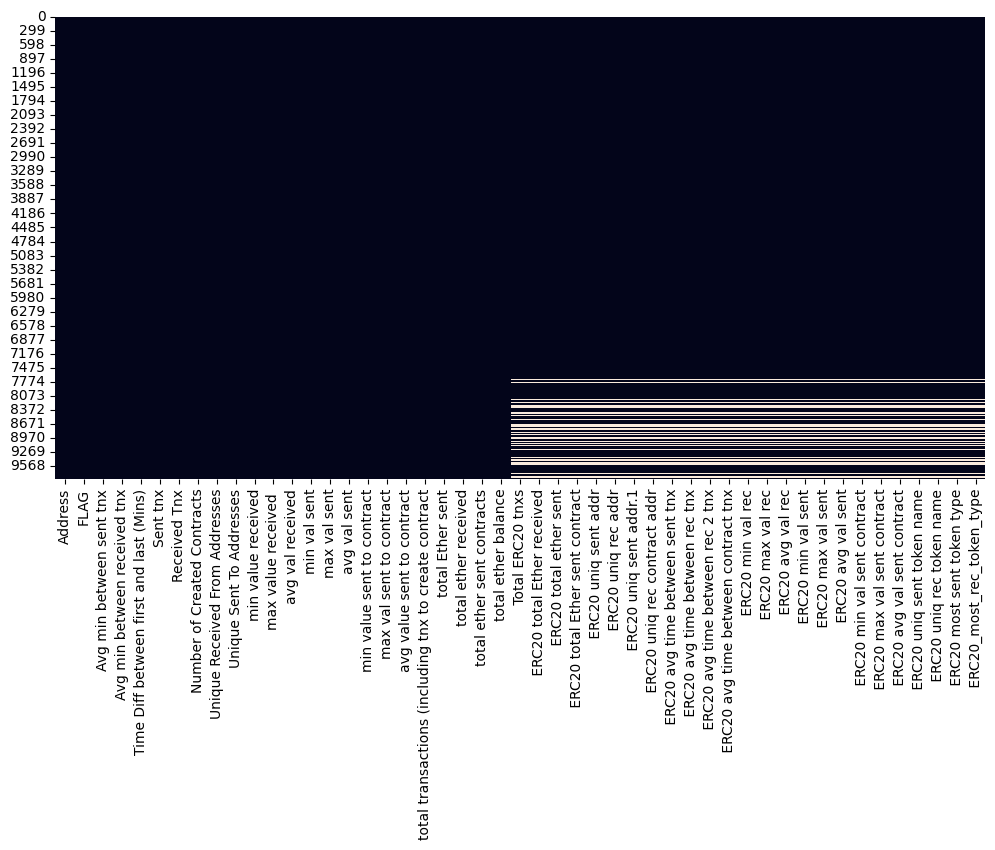

In [237]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

(9841, 46)


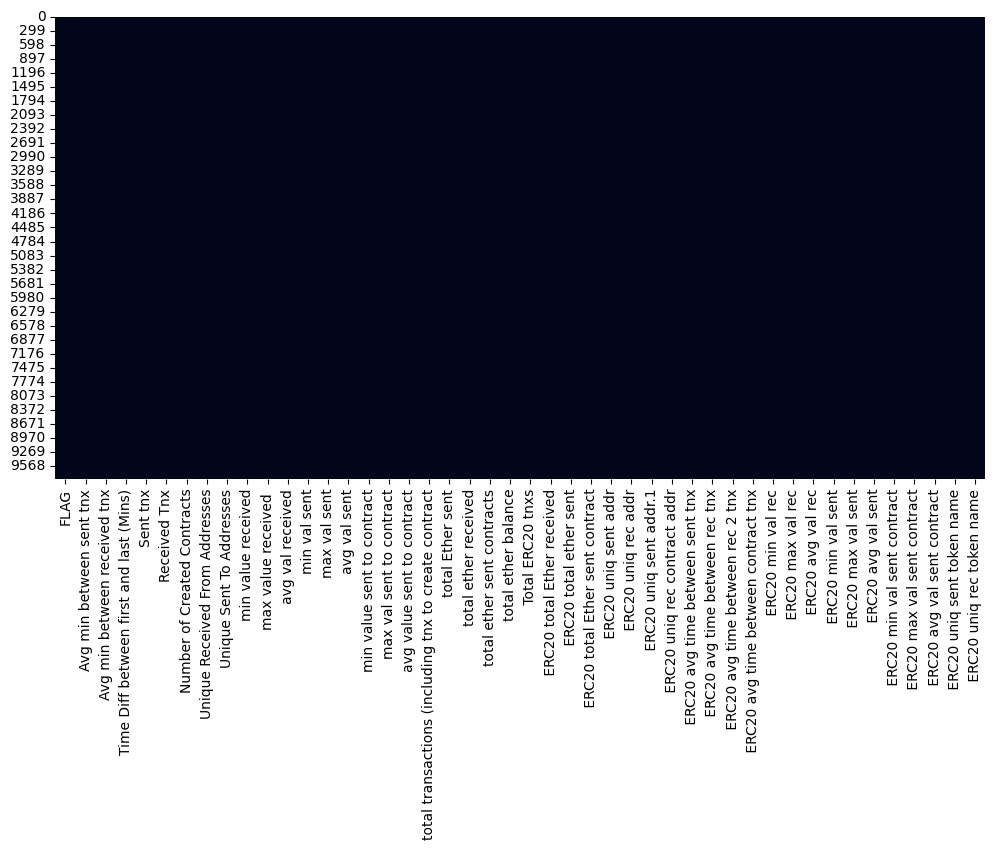

In [238]:
# Eliminamos duplicados
df.drop(df[categories], axis=1, inplace=True)
# Replace missings of numerical variables with median ¿¿¿¿¿AVERAGE/MEDIAN??????
df.fillna(df.median(), inplace=True)
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


-------VARIANZAS-SHAPE----------
FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received   

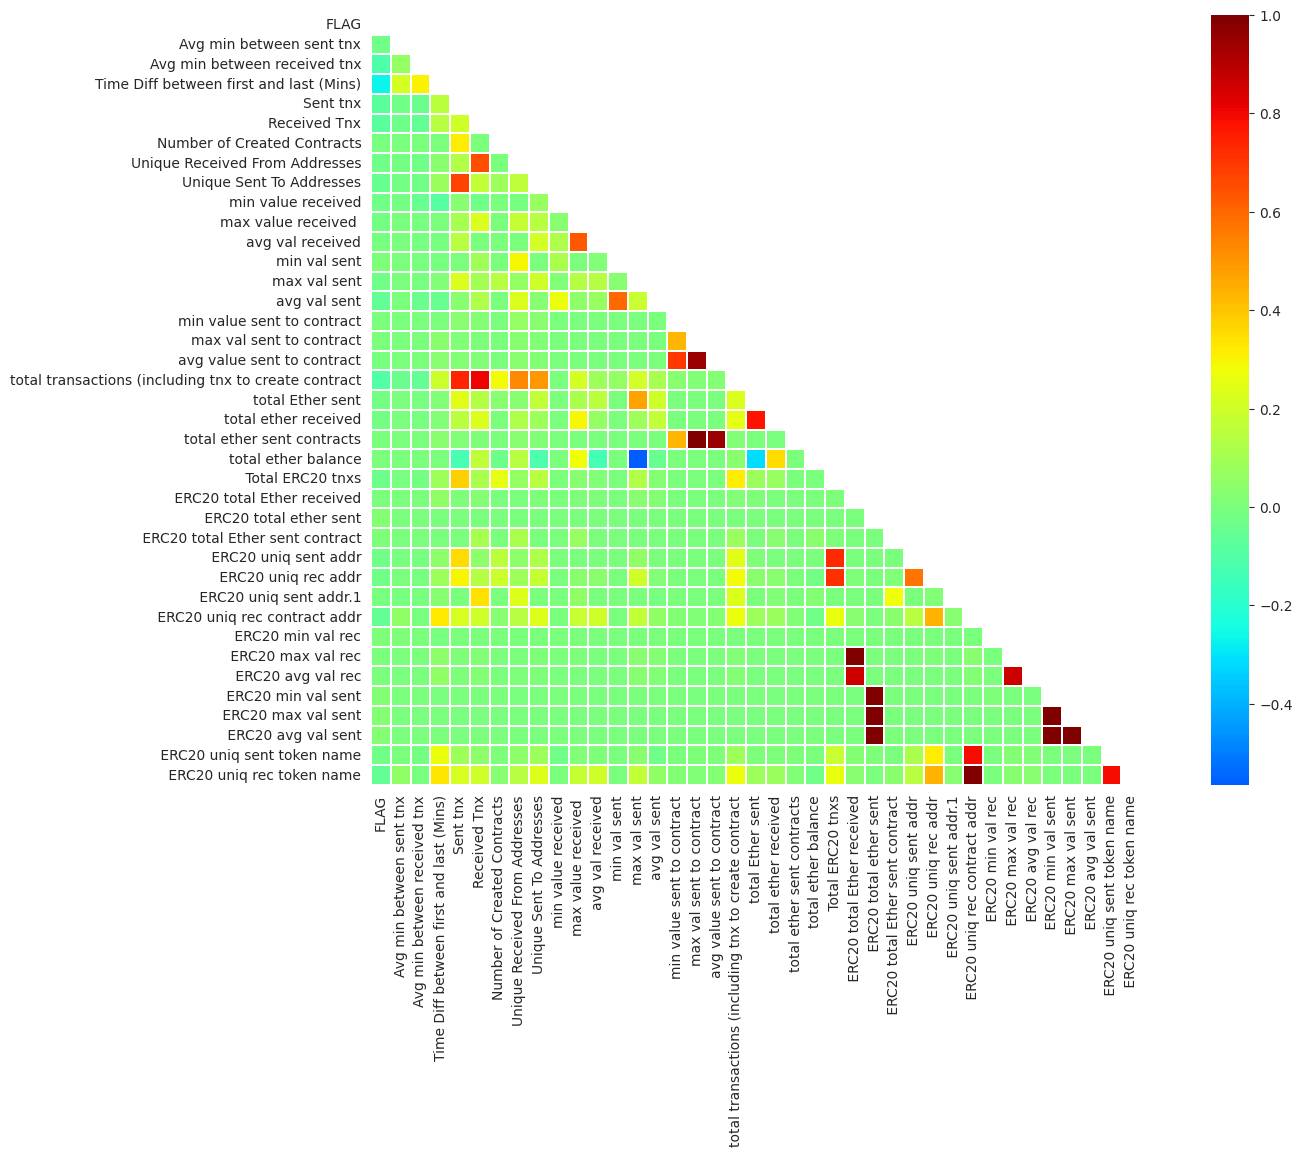

In [239]:
# buscamos columnas con 0 varianza (NO SIRVEN)
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Quitamos columnas con varianza=0, no sirven para entrenar el modelo

df.drop(df.var()[no_var].index, axis = 1, inplace = True)

print("-------VARIANZAS----------")
print(df.var())
print(df.shape)

print("NUMBER OF COLUMNS:   ",len(df.columns))
corr = df.corr()
print ("CORRELATION VALUES")
#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='jet', linewidths=0.1, center=0, square=True)

21
NUMBER OF COLUMNS:    19
CORRELATION VALUES


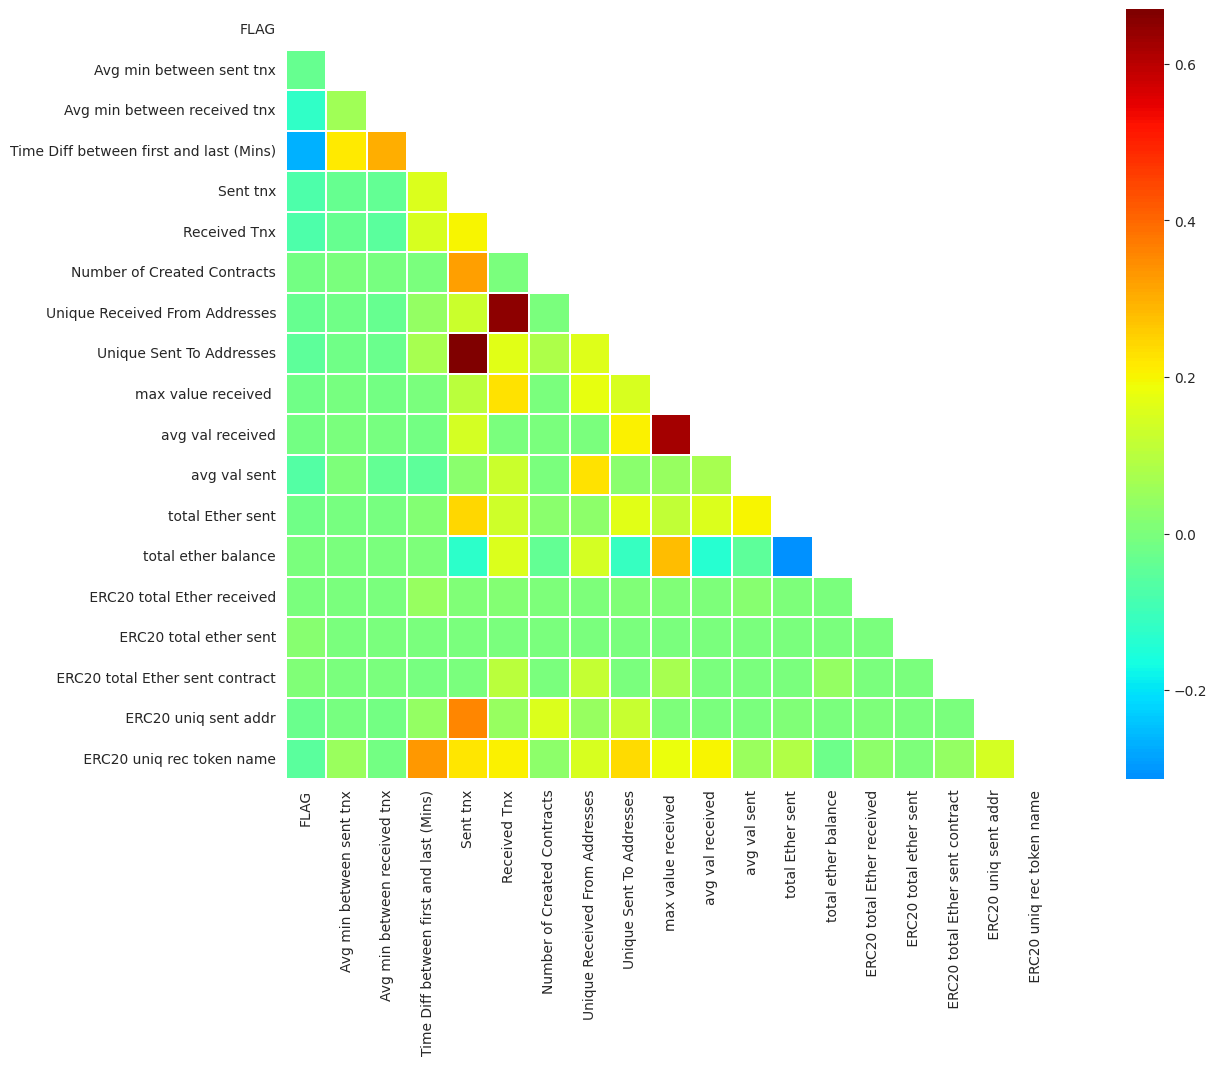

In [240]:
drop = [ 'total transactions (including tnx to create contract','total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent','min value sent to contract','avg value sent to contract',' ERC20 uniq sent addr.1', ' ERC20 max val sent', ' Total ERC20 tnxs', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
print(len(drop))
df.drop(drop, axis=1, inplace=True)
corr = df.corr()
print("NUMBER OF COLUMNS:   ",len(df.columns))


#print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='jet', linewidths=0.1, center=0, square=True)

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'max value received ', 'avg val received',
       'avg val sent', 'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec token name'],
      dtype='object')


C:\Users\docam\AppData\Local\Temp\ipykernel_5376\685568039.py:10: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


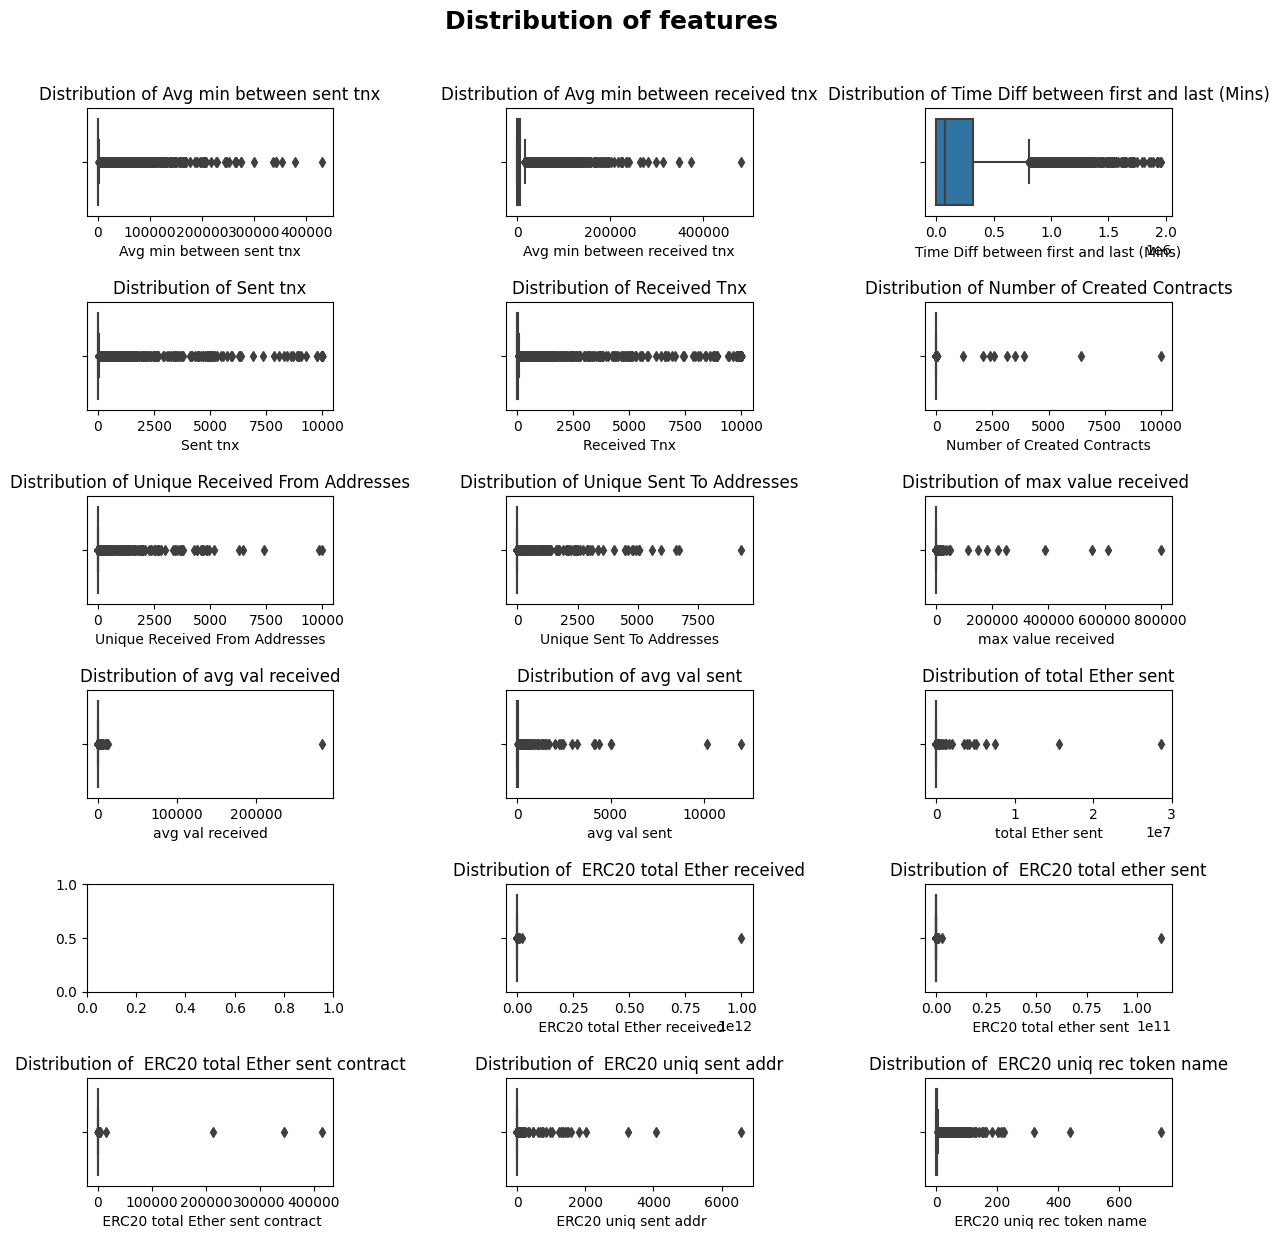

In [241]:
columns = df.columns
print(columns)
# Muestra boxplots con las distribuciones   MAL POR CAMBIO DE COLUMNAS
b=20
#Quita valores duplicados
df[df.duplicated()== True]
df.drop_duplicates(inplace = True)

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,2], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

#ax18 = sns.boxplot(ax = axes[5,2], data=df, x=columns[19])
#ax18.set_title(f'Distribution of {columns[19]}')
####################GRAFICOS HAY QUE RETOCARLOS#################3
plt.show()

DATA SET UP

In [257]:
for i in df.columns:
    print(f'La columna --{i}-- tiene --{len(df[i].value_counts())}-- valores únicos')

La columna --FLAG-- tiene --2-- valores únicos
La columna --Avg min between sent tnx-- tiene --5013-- valores únicos
La columna --Avg min between received tnx-- tiene --6223-- valores únicos
La columna --Time Diff between first and last (Mins)-- tiene --7810-- valores únicos
La columna --Sent tnx-- tiene --641-- valores únicos
La columna --Received Tnx-- tiene --727-- valores únicos
La columna --Number of Created Contracts-- tiene --20-- valores únicos
La columna --Unique Received From Addresses-- tiene --256-- valores únicos
La columna --Unique Sent To Addresses-- tiene --258-- valores únicos
La columna --max value received -- tiene --6302-- valores únicos
La columna --avg val received-- tiene --6767-- valores únicos
La columna --avg val sent-- tiene --5854-- valores únicos
La columna --total Ether sent-- tiene --5868-- valores únicos
La columna --total ether balance-- tiene --5717-- valores únicos
La columna -- ERC20 total Ether received-- tiene --3460-- valores únicos
La columna -- 

In [243]:
### Quitar espacios de las columnas 
df_copy = df.copy()
for i in df_copy.columns:
    df_copy.rename(columns=str.strip,inplace = True)



y = df.iloc[:, 0]
X = df.iloc[:, 1:]

print(X)
print(X.shape, y.shape)

# Separar en train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
X_train.head()
print(X_test.shape, y_test.shape)

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9835                      0.00                          0.00   
9836                  12635.10                        631.39   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
2           

Shape of the training before SMOTE: ((7253, 18), (7253,))
Shape of the training after SMOTE: ((11854, 18), (11854,))


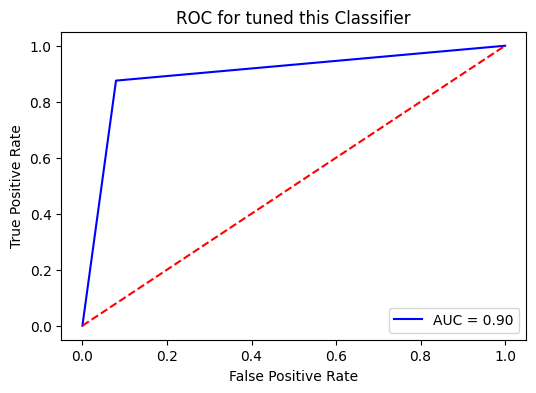

In [264]:
# Normalizacion 
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

MODELIZACION

(1814,)
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1485
           1       0.70      0.88      0.78       329

    accuracy                           0.91      1814
   macro avg       0.84      0.90      0.86      1814
weighted avg       0.92      0.91      0.91      1814

[[1364  121]
 [  41  288]]
Accuracy: 0.8213891951488423


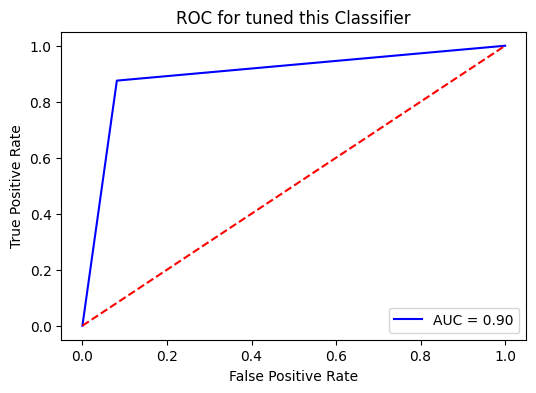

AUC score:   0.9664384472895111


In [272]:
#######LOGISTIC REGRESION###########
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features###USED IN ALLLL

norm_test_f = norm.transform(X_test)

preds = LR.predict(norm_test_f)
print(y_test.shape)
y_test.value_counts()

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
print(f'Accuracy: {accuracy}')
#plt.plot_confusion_matrix(LR, norm_test_f, y_test)

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC score:  ", score )

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1485
           1       0.89      0.96      0.92       329

    accuracy                           0.97      1814
   macro avg       0.94      0.97      0.95      1814
weighted avg       0.97      0.97      0.97      1814

[[1444   41]
 [  13  316]]


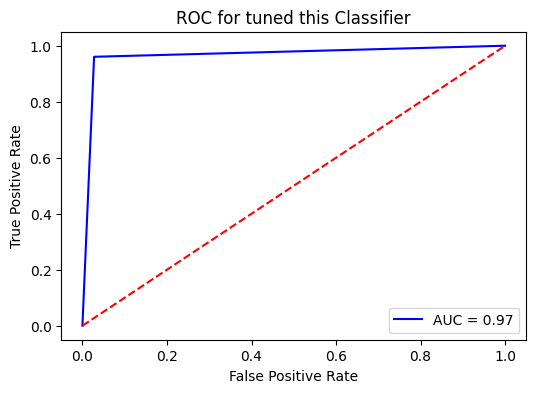

AUC score:   0.9664384472895111


In [270]:
###KNN classifier
knn = KNeighborsClassifier(n_neighbors=4) # initialize the KNN classifier with 5 nearest neighbors
knn.fit(x_tr_resample, y_tr_resample) # fit the classifier to the training data

preds = knn.predict(norm_test_f) # predict the target variable for the test data
# calculate the accuracy
score = roc_auc_score(y_test, preds)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC score:  ", score )

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1485
           1       0.93      0.97      0.95       329

    accuracy                           0.98      1814
   macro avg       0.96      0.98      0.97      1814
weighted avg       0.98      0.98      0.98      1814

[[1461   24]
 [  11  318]]


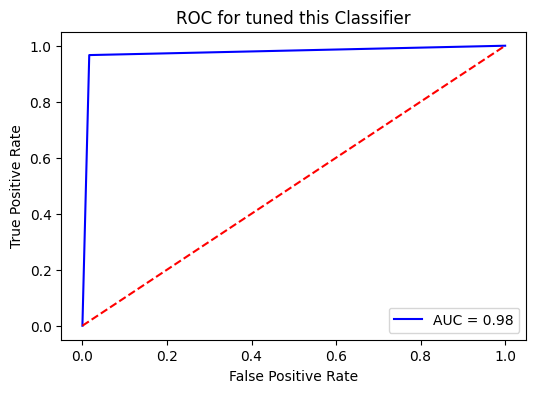

AUC score:   0.9752018666912284


In [269]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_tr_resample,y_tr_resample)
preds=clf.predict(norm_test_f)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

score = roc_auc_score(y_test, preds)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score:  ", score )

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1485
           1       0.48      0.86      0.62       329

    accuracy                           0.81      1814
   macro avg       0.72      0.83      0.74      1814
weighted avg       0.88      0.81      0.82      1814

[[1180  305]
 [  46  283]]


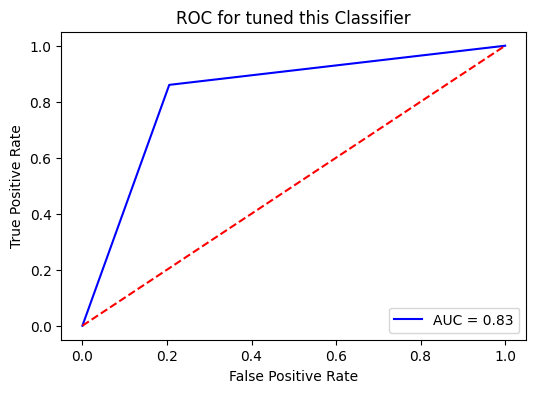

AUC score:   0.8273975827167317


In [267]:
##Funcionan: GaussianNB,  BernoulliNB, No funcionan: CategoricalNB , ComplementNB,MultinomialNB
##Naive Bayes algorithm
nbayes = BernoulliNB()
nbayes.fit(x_tr_resample, y_tr_resample)
preds=nbayes.predict(norm_test_f)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.title('ROC for tuned this Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

score = roc_auc_score(y_test, preds)
print("AUC score:  ", score )